<a href="https://colab.research.google.com/github/toni-ramchandani/AIMasterClassTTT/blob/main/Day3_2_GraphDBs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://neo4j.com/docs/aura/aurads/create-instance/#:~:text=Navigate%20to%20the%20Neo4j%20Aura,that%20the%20instance%20should%20support.


### **Introduction to Graph Databases**

**Graph databases** are designed to treat relationships between data as equally important to the data itself. Unlike relational databases that link data by references or foreign keys, graph databases use nodes, edges, and properties to represent and store data. The structure allows for high-performance queries of complex interconnectivity.

### **Core Concepts**

1. **Nodes**: Represent entities (e.g., people, businesses, accounts). Nodes can hold various key-value pair properties.

2. **Edges (Relationships)**: Define the relationships between nodes. These relationships are first-class citizens in graph databases and can also contain properties that describe the relationship.

3. **Properties**: Both nodes and edges can have properties, which store data in key-value pairs. This data enriches the nodes or edges with attributes like weights, types, or temporal data.

4. **Labels**: Nodes and relationships can be tagged with labels representing their different roles in your domain.

### **Graph Theory Fundamentals**

Graph theory is the study of graphs, which are mathematical structures used to model pairwise relations between objects. A graph in this context is made up of "vertices" (nodes) and "edges" (edges) that connect pairs of vertices. In graph databases, understanding the basics of graph theory is essential for designing and querying data effectively.

### **Benefits of Graph Databases**

- **Efficient Relationship Queries**: The model allows for fast retrieval of complex relationship patterns that are much slower to retrieve in relational databases due to the join operations required.
  
- **Flexibility**: Graph databases easily accommodate changes as they naturally expand to include new kinds of data and new relationships without large-scale schema changes.

- **Intuitive Data Modeling**: Graph databases allow you to model your data in a way that is much more expressive and closer to real-world systems.

### **Architecture**

- **Storage Options**: Graph databases can store data in-memory for fast access or persistently on disk. Data is stored in structures optimized for traversal, often using adjacency lists.

- **Indexing**: Graph databases use indexing to speed up query processing. Indices are usually maintained on nodes, relationships, and properties.

- **Query Languages**: Cypher, Gremlin, and GQL are popular graph query languages that offer powerful and expressive frameworks for working with graph data.

### **Use Cases**

- **Social Networking**: Graph databases power many social media platforms’ features such as recommendations, friend suggestions, and news feed optimizations.

- **Fraud Detection**: By analyzing the relationships between transactions, user accounts, and known fraud patterns, companies can detect and prevent fraud more effectively.

- **Network and IT Operations**: Graph databases are used to model and monitor networks, manage IT infrastructure, and optimize paths for data flow.

- **Recommendation Engines**: By understanding customer preferences and product relationships, companies can tailor suggestions to individual users.

### **Challenges**

- **Scalability**: Handling very large graphs, especially those that require distribution over several machines, is challenging.
  
- **Complexity**: The power of graph databases comes with a cost in terms of learning how to model effectively in graphs and write queries in graph-specific languages.

- **Transaction Support**: Maintaining ACID properties in distributed graph processing is non-trivial and requires sophisticated coordination mechanisms.

### **Future Trends**

- **Integration with AI and Machine Learning**: Graph databases are increasingly integrating with AI algorithms for enhanced pattern recognition, anomaly detection, and machine learning.

- **Graph Analytics**: Advanced analytics on graphs with support for deep learning is a growing trend, enabling new insights from connected data.

- **Standardization**: Efforts like the development of GQL (Graph Query Language) aim to standardize graph database querying, akin to SQL for relational databases.



Graph databases represent a significant shift in database technology, primarily driven by the need to efficiently process relationships within data. As businesses continue to face more complex and interconnected data challenges, the role of graph databases is set to grow, driven by their superior capabilities in handling connected data compared to traditional database systems. Future advancements in graph databases are likely to provide even more powerful tools for data analytics, artificial intelligence, and real-time data processing applications.


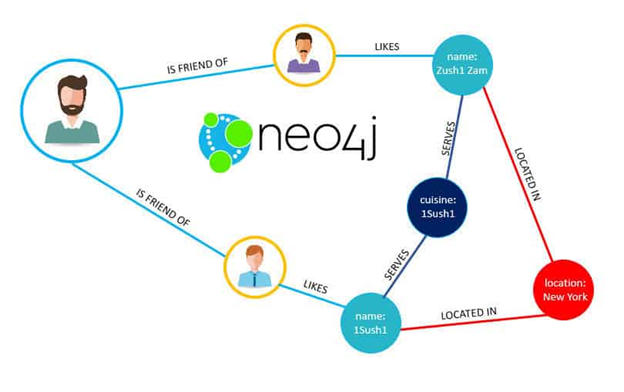

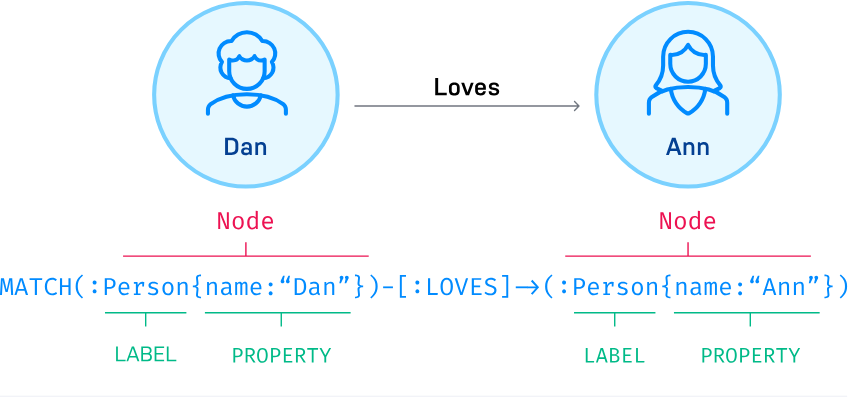

In [1]:
!apt-get update
!apt-get install -y docker.io
!docker run --name test-neo4j -p 7474:7474 -p 7687:7687 -d -e NEO4J_AUTH=neo4j/test123 neo4j:latest


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,188 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,527 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/

In [2]:
!pip install neo4j


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 4.6 MB/s eta 0:00:00


In [4]:
from neo4j import GraphDatabase

uri = "neo4j+s://5dcac2ca.databases.neo4j.io"  # or the URI provided by AuraDB
username = "neo4j"  # default username or as set in AuraDB
password = "IiQO5n-WWgszfXkVVmfFICOdFsnxhIbblEe-pT0QzUY"  # replace with your actual password

driver = GraphDatabase.driver(uri, auth=(username, password))

def run_query():
    with driver.session() as session:
        result = session.run("CREATE (n:Person {name: 'Neo'}) RETURN n.name")
        for record in result:
            print(record['n.name'])

run_query()


Neo


In [5]:
def add_friends():
    query = """
    CREATE (a:Person {name: 'Alice'})
    CREATE (b:Person {name: 'Bob'})
    CREATE (a)-[:KNOWS]->(b)
    RETURN a, b
    """
    with driver.session() as session:
        session.run(query)

def find_friends():
    query = """
    MATCH (a:Person)-[:KNOWS]->(b:Person)
    RETURN a.name, b.name
    """
    with driver.session() as session:
        result = session.run(query)
        for record in result:
            print(f"{record['a.name']} knows {record['b.name']}")

add_friends()
find_friends()


Alice knows Bob


In [6]:
!pip install py2neo matplotlib networkx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 3.8 MB/s eta 0:00:00


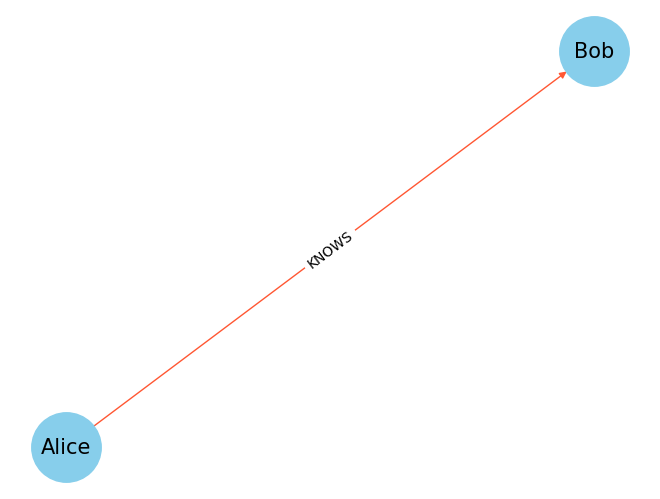

In [9]:
from py2neo import Graph
import networkx as nx
import matplotlib.pyplot as plt

# Connect to Neo4j

uri = "neo4j+s://5dcac2ca.databases.neo4j.io"  # or the URI provided by AuraDB
username = "neo4j"  # default username or as set in AuraDB
password = "IiQO5n-WWgszfXkVVmfFICOdFsnxhIbblEe-pT0QzUY"
graph = Graph(uri, auth=(user, password))

# Fetch data from Neo4j
query = """
MATCH (n)-[r]->(m)
RETURN n.name AS start_node, type(r) AS relation, m.name AS end_node
"""
data = graph.run(query)

# Create a NetworkX graph
G = nx.DiGraph()
for row in data:
    G.add_edge(row['start_node'], row['end_node'], label=row['relation'])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='#FF5733', node_size=2500, font_size=15)
labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


To create a more intricate and culturally resonant example of a family network in an Indian context, let's expand the family tree to include extended family members commonly acknowledged in Indian families, such as grandparents, in-laws, and various cousins. This setup will be richer and more reflective of the typical large and interconnected Indian family structures.

### **Scenario Description**

In this expanded Indian family tree, we'll add grandparents, various uncles, aunts, and cousins, including both paternal and maternal sides, which is a common focus in Indian genealogy. This will illustrate a multi-generational and extensive network of relationships.

### **Family Members and Relationships**

Here's an outline of the more complex family structure:

- **Amit** and **Anjali** are married.
- **Amit** has a brother named **Vikram** and a sister named **Priya**.
- **Anjali** has a sister named **Deepika**.
- **Amit** and **Anjali** have two children, **Rohan** and **Sonia**.
- **Vikram** is married to **Isha**, and they have a son named **Arjun**.
- **Priya** is married to **Nitin**, and they have a daughter named **Neha**.
- **Deepika** is married to **Karan**, and they have a daughter named **Mira**.
- **Amit** and **Priya**’s parents are **Rajesh** and **Sunita**.
- **Anjali** and **Deepika**’s parents are **Sunil** and **Meena**.

### **Implementing This in Neo4j**

#### **Step 1: Create Nodes for Each Family Member**
```cypher
CREATE (Amit:Person {name: 'Amit'})
CREATE (Anjali:Person {name: 'Anjali'})
CREATE (Vikram:Person {name: 'Vikram'})
CREATE (Priya:Person {name: 'Priya'})
CREATE (Deepika:Person {name: 'Deepika'})
CREATE (Rohan:Person {name: 'Rohan'})
CREATE (Sonia:Person {name: 'Sonia'})
CREATE (Isha:Person {name: 'Isha'})
CREATE (Arjun:Person {name: 'Arjun'})
CREATE (Nitin:Person {name: 'Nitin'})
CREATE (Neha:Person {name: 'Neha'})
CREATE (Karan:Person {name: 'Karan'})
CREATE (Mira:Person {name: 'Mira'})
CREATE (Rajesh:Person {name: 'Rajesh'})
CREATE (Sunita:Person {name: 'Sunita'})
CREATE (Sunil:Person {name: 'Sunil'})
CREATE (Meena:Person {name: 'Meena'})
```

#### **Step 2: Establish Relationships**
```cypher
// Marriage and Parental Relationships
CREATE (Amit)-[:MARRIED_TO]->(Anjali)
CREATE (Vikram)-[:MARRIED_TO]->(Isha)
CREATE (Priya)-[:MARRIED_TO]->(Nitin)
CREATE (Deepika)-[:MARRIED_TO]->(Karan)
CREATE (Amit)-[:FATHER_OF]->(Rohan), (Amit)-[:FATHER_OF]->(Sonia)
CREATE (Anjali)-[:MOTHER_OF]->(Rohan), (Anjali)-[:MOTHER_OF]->(Sonia)
CREATE (Vikram)-[:FATHER_OF]->(Arjun)
CREATE (Isha)-[:MOTHER_OF]->(Arjun)
CREATE (Nitin)-[:FATHER_OF]->(Neha)
CREATE (Priya)-[:MOTHER_OF]->(Neha)
CREATE (Karan)-[:FATHER_OF]->(Mira)
CREATE (Deepika)-[:MOTHER_OF]->(Mira)
CREATE (Rajesh)-[:FATHER_OF]->(Amit), (Rajesh)-[:FATHER_OF]->(Priya)
CREATE (Sunita)-[:MOTHER_OF]->(Amit), (Sunita)-[:MOTHER_OF]->(Priya)
CREATE (Sunil)-[:FATHER_OF]->(Anjali), (Sunil)-[:FATHER_OF]->(Deepika)
CREATE (Meena)-[:MOTHER_OF]->(Anjali), (Meena)-[:MOTHER_OF]->(Deepika)
```

### **Visualizing the Family Tree**
You can visualize this using Neo4j's browser-based tool, which would allow you to see how the family is interconnected through various relationships such as marital ties and parent-child relationships.

### **Example Queries**
To explore this family structure, you might run queries like:

- **Find all of Amit’s children**:
```cypher
MATCH (p:Person {name: 'Amit'})-[:FATHER_OF]->(children)
RETURN children.name
```

- **Query the family tree to find all cousins**:
```cypher
MATCH (child:Person)-[:CHILD_OF]->(:Person)<-[:SIBLING_OF]-(:Person)-[:PARENT_OF]->(cousin)
RETURN child.name, collect(cousin.name) AS Cousins
```

This more detailed scenario gives a realistic view of an Indian family’s complexity and showcases how graph databases can be used to manage and analyze intricate family relationships effectively.

In [11]:
from neo4j import GraphDatabase

uri = "neo4j+s://5dcac2ca.databases.neo4j.io"  # or the URI provided by AuraDB
username = "neo4j"  # default username or as set in AuraDB
password = "IiQO5n-WWgszfXkVVmfFICOdFsnxhIbblEe-pT0QzUY"
# Initialize the Neo4j driver
driver = GraphDatabase.driver(uri, auth=(username, password))

def create_nodes(tx):
    # Create nodes with relationships
    tx.run("""
        CREATE (Amit:Person {name: 'Amit', age: 32, city: 'Delhi'})
        CREATE (Anjali:Person {name: 'Anjali', age: 30, city: 'Delhi'})
        CREATE (Vikram:Person {name: 'Vikram', age: 35, city: 'Mumbai'})
        CREATE (Priya:Person {name: 'Priya', age: 25, city: 'Bangalore'})
        CREATE (Rohan:Person {name: 'Rohan', age: 5})
        CREATE (Sonia:Person {name: 'Sonia', age: 8})
        CREATE (Amit)-[:MARRIED_TO]->(Anjali)
        CREATE (Amit)-[:SIBLING_OF]->(Vikram)
        CREATE (Amit)-[:SIBLING_OF]->(Priya)
        CREATE (Amit)-[:FATHER_OF]->(Rohan)
        CREATE (Amit)-[:FATHER_OF]->(Sonia)
        CREATE (Anjali)-[:MOTHER_OF]->(Rohan)
        CREATE (Anjali)-[:MOTHER_OF]->(Sonia)
    """)

def update_node(tx, name, city):
    # Update a node's property
    tx.run("MATCH (p:Person {name: $name}) SET p.city = $city RETURN p.name, p.city", name=name, city=city)

def delete_relationship(tx, name1, name2):
    # Delete a specific relationship
    tx.run("MATCH (p1:Person {name: $name1})-[r:MARRIED_TO]-(p2:Person {name: $name2}) DELETE r", name1=name1, name2=name2)

def find_person(tx, name):
    # Find and return a person
    result = tx.run("MATCH (p:Person {name: $name}) RETURN p.name, p.age, p.city", name=name)
    for record in result:
        print(record['p.name'], record['p.age'], record['p.city'])

# Using the driver's session to execute transactions
with driver.session() as session:
    # Creating nodes and relationships
    session.write_transaction(create_nodes)

    # Updating a node
    session.write_transaction(update_node, 'Priya', 'Pune')

    # Deleting a relationship
    session.write_transaction(delete_relationship, 'Amit', 'Anjali')

    # Finding a person
    session.read_transaction(find_person, 'Priya')

# Close the driver after all transactions are done
driver.close()


<ipython-input-11-377fbdbefec3>:44: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(create_nodes)
<ipython-input-11-377fbdbefec3>:47: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(update_node, 'Priya', 'Pune')
<ipython-input-11-377fbdbefec3>:50: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(delete_relationship, 'Amit', 'Anjali')
<ipython-input-11-377fbdbefec3>:53: DeprecationWarning: read_transaction has been renamed to execute_read
  session.read_transaction(find_person, 'Priya')


Priya 25 Pune


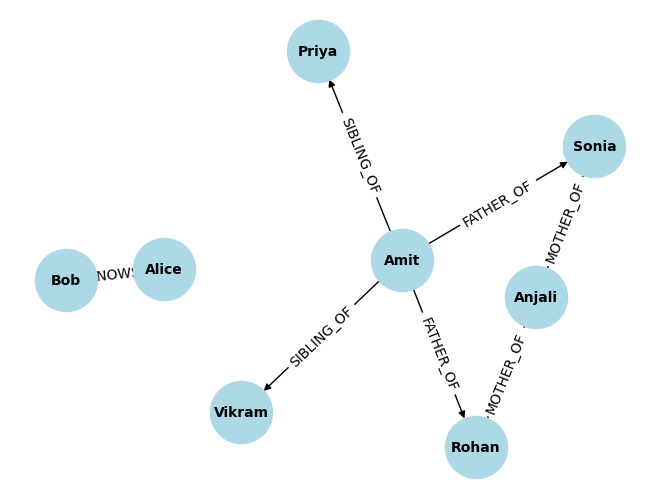

In [12]:
from py2neo import Graph
import matplotlib.pyplot as plt
import networkx as nx
uri = "neo4j+s://5dcac2ca.databases.neo4j.io"  # or the URI provided by AuraDB
username = "neo4j"  # default username or as set in AuraDB
password = "IiQO5n-WWgszfXkVVmfFICOdFsnxhIbblEe-pT0QzUY"
# Connect to Neo4j
graph = Graph(uri, auth=("neo4j", password))

# Fetch data
query = """
MATCH (n)-[r]->(m) RETURN n.name AS start, type(r) AS relationship, m.name AS end
"""
data = graph.run(query)

# Create a NetworkX graph
G = nx.DiGraph()

# Add nodes and edges from Neo4j
for row in data:
    G.add_node(row['start'])
    G.add_node(row['end'])
    G.add_edge(row['start'], row['end'], label=row['relationship'])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()
